Loading Required Libraries for data anaysis

In [ ]:
import pandas as pd   # pyright: ignore[reportMissingImports]
import numpy as np
import matplotlib.pyplot as plt   # pyright: ignore[reportMissingImports]
import seaborn as sns   # pyright: ignore[reportMissingModuleSource]


Loading CSV dataset  from kaggle named heart.csv

In [14]:
data=pd.read_csv("heart.csv")


In [15]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [16]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Data Dictionary 
1. age: age in years
2. sex: sex
1 = male
0 = female
3. cp: chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
1 = true;
0 = false
7. restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
exang: exercise induced angina
1 = yes
0 = no
9. oldpeak = ST depression induced by exercise relative to rest
10. slope: the slope of the peak exercise ST segment
Value 0: upsloping
Value 1: flat
Value 2: downsloping
11. ca: number of major vessels (0-3) colored by flourosopy
12. thal:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect
13. target (the lable):
0 = no disease,
1 = disease



Renaming columns for eaz of understanding 


In [17]:
data=data.rename(
    columns={
        'cp':'chest_pain_type',
        'trestbps':'resting_blood_pressure',
        'chol':'cholestrol',
        'fbs':'fasting_blood_sugar',
        'restecg':'resting_ecg',
        'thalach':'max_heart_rate_achieved',
        'exang':'exercise_induced_angina',
        'oldpeak':'st_depression',
        'slope':'st_slope',
        'ca':'num_major_vessels',
        'thal':'thalassemia'
    },
    errors='raise'
)

In [19]:
data['sex'][data['sex']==0]=='female'
data['sex'][data['sex']==1]=='male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'
data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_ecg'][data['resting_ecg'] == 0] = 'normal'
data['resting_ecg'][data['resting_ecg'] == 1] = 'ST-T wave abnormality'
data['resting_ecg'][data['resting_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'


/var/folders/8x/8z2zzzxx7xn7mf0hcm8wvtxm0000gn/T/ipykernel_4845/4130722480.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['resting_ecg'][data['resting_ecg'] == 0] = 'normal'
/var/folders/8x/8z2zzzxx7xn7mf0hcm8wvtxm0000gn/T/ipykern

In [20]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholestrol                   int64
fasting_blood_sugar          int64
resting_ecg                  int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [22]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,0,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,1,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,0,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


Grouping features


In [24]:
#numerical features 
num_features=['age','cholestrol','resting_blood_pressure','max_heart_rate_achieved','st_depression','num_major_vessels']

#binary 
bin_features=['sex','fasting_blood_sugar','exercise_induced_angina','target']

#categorical 
nom_features= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_features = nom_features + bin_features


Data Analysis using graphs 

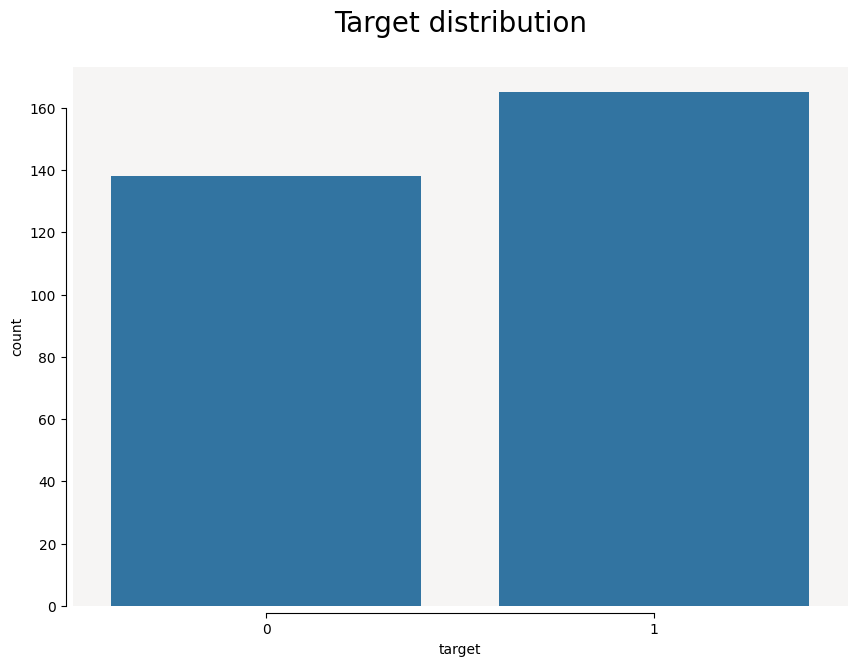

In [26]:
plt.figure(figsize=(10,7))
total=float(len(data))
ax=sns.countplot(x=data['target'])
ax.set_facecolor("#F6F5F4")

ax.set_title('Target distribution',fontsize=20,y=1.05)
sns.despine(right=True)
sns.despine(offset=5,trim=True)

Graphs of some selected features

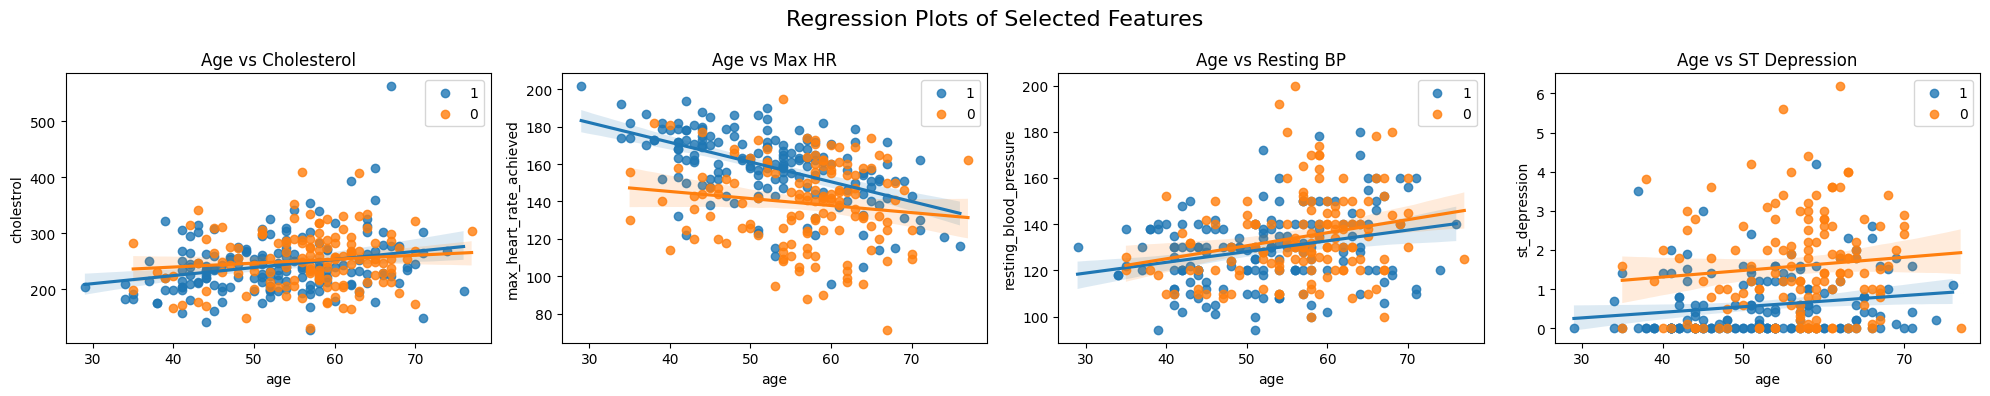

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

sns.regplot(data=data[data['target'] == 1], x='age', y='cholestrol', ax=ax[0],  label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='cholestrol', ax=ax[0],  label='0')
ax[0].set_title('Age vs Cholesterol')
ax[0].legend()

sns.regplot(data=data[data['target'] == 1], x='age', y='max_heart_rate_achieved', ax=ax[1],  label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='max_heart_rate_achieved', ax=ax[1],  label='0')
ax[1].set_title('Age vs Max HR')
ax[1].legend()

sns.regplot(data=data[data['target'] == 1], x='age', y='resting_blood_pressure', ax=ax[2],  label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='resting_blood_pressure', ax=ax[2], label='0')
ax[2].set_title('Age vs Resting BP')
ax[2].legend()

sns.regplot(data=data[data['target'] == 1], x='age', y='st_depression', ax=ax[3],  label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='st_depression', ax=ax[3],  label='0')
ax[3].set_title('Age vs ST Depression')
ax[3].legend()

plt.suptitle('Regression Plots of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()
